# Ejercicio 3
Contenido del dataset: Conjunto de datos de teledetección de alta resolución (Quickbird). Un pequeño número de muestras de formación de árboles enfermos, un gran número de otras coberturas terrestres. Conjunto de datos de prueba de una muestra aleatoria estratificada de imagen.
El ejercicio consiste obtener un clasificador para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Hay 6 atributos, el primero es la clase: 'w' (diseased trees), 'n' (all other land cover), el segundo es GLCM_Pan: GLCM mean texture (Pan band), el tercero es Mean_G: Mean green value, el cuarto es Mean_R: Mean red value, el quinto es Mean_NIR: Mean NIR value
, y el sexto es SD_Pan: Standard deviation (Pan band). El dataset está en formato csv y se da por separado el conjunto test (testing.csv) y de entrenamiento (training.csv)
*   URL: https://archive.ics.uci.edu/ml/datasets/Wilt
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip

*Tomando como base el ejemplo 8 de los suministrados en clase, implementar un clasificador basado en Random Forest que contenga los siguientes apartados.
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify si las clases estuviesen desbalanceadas.
*   Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Obtener curva ROC y su área.
*   Obtener curva presición recall.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

In [1]:
import pandas as pd

In [2]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
unzip wilt.zip

Archive:  wilt.zip
  inflating: testing.csv             
  inflating: training.csv            


--2022-12-26 09:45:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118593 (116K) [application/x-httpd-php]
Saving to: ‘wilt.zip’

     0K .......... .......... .......... .......... .......... 43%  193K 0s
    50K .......... .......... .......... .......... .......... 86%  389K 0s
   100K .......... .....                                      100% 75.8M=0.4s

2022-12-26 09:45:43 (299 KB/s) - ‘wilt.zip’ saved [118593/118593]



In [3]:
wilt_train = pd.read_csv("/content/training.csv")
wilt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4339 non-null   object 
 1   GLCM_pan    4339 non-null   float64
 2   Mean_Green  4339 non-null   float64
 3   Mean_Red    4339 non-null   float64
 4   Mean_NIR    4339 non-null   float64
 5   SD_pan      4339 non-null   float64
dtypes: float64(5), object(1)
memory usage: 203.5+ KB


In [4]:
wilt_test = pd.read_csv("/content/testing.csv")
wilt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       500 non-null    object 
 1   GLCM_pan    500 non-null    float64
 2   Mean_Green  500 non-null    float64
 3   Mean_Red    500 non-null    float64
 4   Mean_NIR    500 non-null    float64
 5   SD_pan      500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [ ]:
#Antes de definir el clasificador habría que extraer las etiquetas, que están en la primera columna, de los conjuntos de entrenamiento
#y de test, y después habría que borrar esa primera columna de los conjuntos de entrenamiento y test 

In [13]:
X_train = wilt_train[["GLCM_pan",	"Mean_Green",	"Mean_Red",	"Mean_NIR",	"SD_pan"]]
y_train=[]
for i in range(wilt_train['class'].shape[0]):
  y_train.append(wilt_train['class'][i] == 'w')

In [14]:
X_test = wilt_test[["GLCM_pan",	"Mean_Green",	"Mean_Red",	"Mean_NIR",	"SD_pan"]]
y_test=[]
for i in range(wilt_test['class'].shape[0]):
  y_test.append(wilt_train['class'][i] == 'w')

In [15]:
X_train.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,120.362774,205.500000,119.395349,416.581395,20.676318
1,124.739583,202.800000,115.333333,354.333333,16.707151
2,134.691964,199.285714,116.857143,477.857143,22.496712
3,127.946309,178.368421,92.368421,278.473684,14.977453
4,135.431548,197.000000,112.690476,532.952381,17.604193


In [ ]:
y_train


In [18]:
X_test.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,109.828571,183.700000,82.950000,251.750000,16.079412
1,130.284483,212.637931,96.896552,482.396552,21.210295
2,131.386555,185.466667,85.466667,419.666667,13.339998
3,141.345098,180.875000,81.500000,348.062500,18.213577
4,121.383408,218.357143,112.017857,426.607143,19.083196


In [ ]:
y_test

In [20]:
#una vez realizada la division, se realiza el preprocesamiento y el clasificador

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
randomF_clf = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
#criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
#n_estimators: (default=100). Número de árboles en el bosque.
#max_depth: por defecto ninguno (en cuyo caso se extiende hasta que todas sean puras o 
            #no se supere el mínimo número de muestras para dividir)
#max_features: {“sqrt”, “log2”, None}, int or float, default=”sqrt”
            #El número de características a considerar al buscar la mejor división:
            #If int, then consider max_features features at each split.
            #If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
            # If “auto”, then max_features=sqrt(n_features).
            # If “sqrt”, then max_features=sqrt(n_features).
            #If “log2”, then max_features=log2(n_features).
            #If None, then max_features=n_features.
#max_leaf_nodes: int, default=None. Máximo número de ndos hoja. Si se omite el número es ilimitado.

In [28]:
randomF_clf.fit(X_train, y_train)
y_pred_rf = randomF_clf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[353,  73],
       [ 65,   9]])

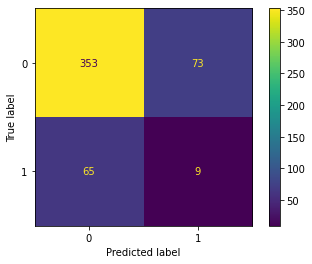

In [30]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [31]:
accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)

(0.724, 0.10975609756097561, 0.12162162162162163, 0.11538461538461538)

In [32]:
#Ahora vamos a ver la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score #para obtener la curva roc y su área
from sklearn.metrics import RocCurveDisplay

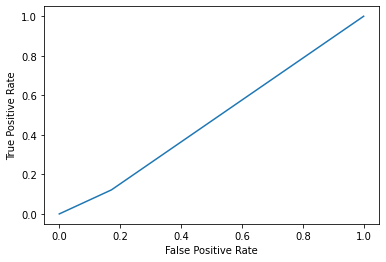

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred_rf, pos_label=randomF_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [36]:
roc_auc_score(y_test, y_pred_rf) #area bajo la curva roc

0.4751300596371019

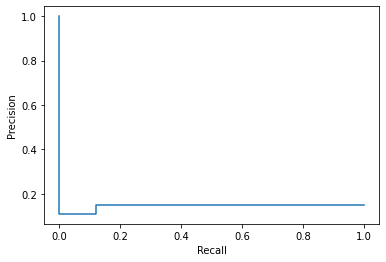

In [35]:
#Ahora vamos a crear la curva precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_pred_rf, pos_label=randomF_clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


# **Resultados** 

\begin{array}{|c|c|} \hline
 & accuracy\_score & precision\_score & recall\_score & f1\_score \\ \hline
Random Forest & 0.724 & 0.1097 & 0.1216 & 0.1153 \\ \hline
\hline
\hline
\hline
\end{array}

Para la realización de este ejercicio, se ha seguido como ejemplo la práctica 8. Pero antes se realizo un procesamiento donde se separaba el dataset en inputs y outputs, teniendo en cuenta que el dataset de train y test se encontraban en dataset distintos. Una vez se realizaba este proceso para cada dataset, se realizaba el pipeline con el StandarScaler y el clasificador RandomForest(para este caso se ha quedado con los parámetros predeterminados).
Los resultados obtenidos son los vistos en la tabla, siendo un clasificador bastante deficiente para este dataset. (Quizás con un entrenamiento con diferentes parámetros para el clasificador, se podría mejorar el resultado)

Respecto a la matriz de confusión, los resultados son los siguiente:

[353,  73]

[ 65,   9]

Respecto al área de la curva Roc y curva presición recall, se puede observar de forma bastante clara en el propio ejercicio, la ineficiencia del clasificador, ya que el aréa de ambas es bastante reducida, en mayor medida en el caso del recall.
Practicamente se puede decir, que este clasificador clasifica de forma correcta el 50% de las vez el patron de entrada que recibe.